In [23]:
import numpy as np
import pandas as pd


from utils.data import extract_eeg_data, multi_to_binary_classification, split_dataset, dict_to_arr
from utils.labels import get_stai_labels
from utils.valid_recs import get_valid_recs
from utils.metrics import compute_metrics

from classifiers import EEGNet_classification, EEGNet_SSVEP_classification, EEGNet_TSGL_classification, EEGNet_DeepConvNet_classification, EEGNet_ShallowConvNet_classification, EEGNet_TSGLEEGNet_classification
import utils.variables as v


In [2]:
valid_recs = get_valid_recs(data_type='new_ica', output_type = 'np')
print(f'Valid recs {valid_recs}')

x_dict_ = extract_eeg_data(valid_recs, data_type='new_ica', output_type='np')


ERROR:root:1) Failed to read data for recording P006_S002_001
ERROR:root:1) Failed to read data for recording P006_S002_002
ERROR:root:1) Failed to read data for recording P010_S001_001


Filtering out invalid recordings



ERROR:root:1) Failed to read data for recording P013_S001_001
ERROR:root:1) Failed to read data for recording P013_S001_002
ERROR:root:1) Failed to read data for recording P020_S001_001
ERROR:root:1) Failed to read data for recording P023_S002_002
ERROR:root:1) Failed to read data for recording P028_S001_001
ERROR:root:1) Failed to read data for recording P028_S001_002


Returning valid recordings

Valid recs ['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S001_001', 'P002_S001_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S001_001', 'P004_S001_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P005_S002_001', 'P005_S002_002', 'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S001_002', 'P008_S002_001', 'P008_S002_002', 'P009_S001_001', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S001_002', 'P010_S002_001', 'P010_S002_002', 'P011_S001_001', 'P011_S001_002', 'P011_S002_001', 'P011_S002_002', 'P012_S001_001', 'P012_S001_002', 'P012_S002_001', 'P012_S002_002', 'P013_S002_001', 'P013_S002_002', 'P014_S001_001', 'P014_S001_002', 'P014_S002_001', 'P014_S002_002', 'P015_S001_001', 'P015_S001_002', 'P015_S002_001', 'P015_S002_002', 'P016_S001_001', 'P016_S0

In [3]:
y_dict_ = get_stai_labels(valid_recs) 
#y_dict = get_pss_labels(valid_recs)

    SubjectNo  D1Y1  D2Y1  J1Y1  J2Y1
0           1    26    30    29    31
1           2    38    41    26    34
2           3    58    56    36    35
3           4    40    45    24    24
4           5    25    31    38    37
5           6    49    58     0     0
6           7    56    50    28    28
7           8    46    37    23    27
8           9    41    47    27    22
9          10    37    20    23    21
10         11    50    49    31    47
11         12    42    47    47    41
12         13    35    35    28    33
13         14    54    35    26    26
14         15    51    55    33    42
15         16    35    38    42    45
16         17    37    35    24    20
17         18    54    62    41    48
18         19    47    52    30    36
19         20    46    38    24    25
20         21    44    54    33    39
21         22    49    51    28    34
22         23    56    53    33    28
23         24    52    58    36    41
24         25    48    62    29    56
25         2

In [4]:
print(f" Length of data after removing invalid labels: {len(x_dict_)}")
print(f" Lenght og labels after removing invalid labels: {len(y_dict_)}")

 Length of data after removing invalid labels: 103
 Lenght og labels after removing invalid labels: 103


In [5]:
x_dict, y_dict = multi_to_binary_classification(x_dict_, y_dict_)


The extracted keys : 
['P002_S001_001', 'P002_S001_002', 'P004_S001_001', 'P004_S001_002', 'P005_S002_001', 'P005_S002_002', 'P008_S001_002', 'P009_S001_001', 'P012_S001_001', 'P012_S002_002', 'P015_S002_002', 'P016_S001_002', 'P016_S002_001', 'P016_S002_002', 'P017_S001_001', 'P018_S002_001', 'P020_S001_002', 'P021_S001_001', 'P021_S002_002', 'P024_S002_002', 'P026_S001_001', 'P026_S001_002', 'P027_S001_002', 'P027_S002_001']

Dictionary after removal of keys from y_dict: 
 dict_keys(['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S002_001', 'P008_S002_002', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S001_002', 'P010_S002_001', 'P010_S002_002', 'P011_S001_001'

In [6]:
print(f" Length of data after removing mildly stressed subjects: {len(x_dict_)}")
print(f" Lenght og labels after removing  mildly stressed subjects: {len(y_dict_)}")

 Length of data after removing mildly stressed subjects: 79
 Lenght og labels after removing  mildly stressed subjects: 79


In [7]:
train_data_dict, test_data_dict, val_data_dict, train_labels_dict, test_labels_dict, val_labels_dict = split_dataset(x_dict, y_dict)

In [8]:
print(f"Length of train data set: {len(train_data_dict)}")
print(f"Length of validation data set: {len(val_data_dict)}")
print(f"Length of test data set: {len(test_data_dict)}")

Length of train data set: 44
Length of validation data set: 16
Length of test data set: 19


In [9]:
train_data = dict_to_arr(train_data_dict, 'new_ica')
test_data = dict_to_arr(test_data_dict, 'new_ica')
val_data = dict_to_arr(val_data_dict, 'new_ica')

train_labels = np.reshape(np.array(list(train_labels_dict.values())), (len(train_data),1))
test_labels = np.reshape(np.array(list(test_labels_dict.values())), (len(test_data),1))
val_labels = np.reshape(np.array(list(val_labels_dict.values())), (len(val_data),1))

print(f"Shape of train data set: {train_data.shape}")
print(f"Shape of train labels set: {train_labels.shape}")

print(f"Shape of validation data set: {val_data.shape}")
print(f"Shape of validation labels set: {val_labels.shape}")

print(f"Shape of test data set: {test_data.shape}")
print(f"Shape of test labels set: {test_labels.shape}")

Shape of train data set: (44, 8, 38400)
Shape of train labels set: (44, 1)
Shape of validation data set: (16, 8, 38400)
Shape of validation labels set: (16, 1)
Shape of test data set: (19, 8, 38400)
Shape of test labels set: (19, 1)


In [11]:
probs_EEGNet = EEGNet_classification('new_ica',train_data, test_data, val_data, train_labels, test_labels, val_labels)

Epoch 1/300

Epoch 1: val_loss improved from inf to 0.69268, saving model to /tmp\checkpoint.h5
1/1 - 7s - loss: 0.6897 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.6875 - 7s/epoch - 7s/step
Epoch 2/300

Epoch 2: val_loss improved from 0.69268 to 0.69198, saving model to /tmp\checkpoint.h5
1/1 - 7s - loss: 0.6907 - accuracy: 0.5682 - val_loss: 0.6920 - val_accuracy: 0.6875 - 7s/epoch - 7s/step
Epoch 3/300

Epoch 3: val_loss improved from 0.69198 to 0.69120, saving model to /tmp\checkpoint.h5
1/1 - 7s - loss: 0.6838 - accuracy: 0.5682 - val_loss: 0.6912 - val_accuracy: 0.6875 - 7s/epoch - 7s/step
Epoch 4/300

Epoch 4: val_loss improved from 0.69120 to 0.69084, saving model to /tmp\checkpoint.h5
1/1 - 6s - loss: 0.6836 - accuracy: 0.5682 - val_loss: 0.6908 - val_accuracy: 0.6875 - 6s/epoch - 6s/step
Epoch 5/300

Epoch 5: val_loss improved from 0.69084 to 0.69083, saving model to /tmp\checkpoint.h5
1/1 - 7s - loss: 0.6866 - accuracy: 0.5682 - val_loss: 0.6908 - val_accuracy: 0.

In [12]:
preds_EEGNet = probs_EEGNet.argmax(axis = -1)  
print(preds_EEGNet)
print(test_labels[:,0].T)

performance_EEGNet = compute_metrics(test_labels, preds_EEGNet)
print(performance_EEGNet)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0]

 Confusion matrix:
[[11  0]
 [ 8  0]]
Null error in specificity
[57.89 57.89  0.  ]


In [13]:
print(probs_EEGNet)


[[0.5254859  0.47451416]
 [0.5254859  0.47451416]
 [0.5254859  0.47451416]
 [0.5254859  0.47451416]
 [0.5254858  0.4745142 ]
 [0.5254858  0.4745142 ]
 [0.5254858  0.4745142 ]
 [0.5254858  0.4745142 ]
 [0.5254858  0.4745142 ]
 [0.5254858  0.4745142 ]
 [0.5254858  0.4745142 ]
 [0.5254858  0.4745142 ]
 [0.5254858  0.4745142 ]
 [0.5254859  0.47451413]
 [0.5254859  0.47451413]
 [0.5254859  0.47451413]
 [0.5254859  0.47451413]
 [0.5254859  0.47451416]
 [0.5254859  0.47451413]]


Epoch 1/300

Epoch 1: val_loss improved from inf to 0.78027, saving model to /tmp\checkpoint.h5
2/2 - 9s - loss: 0.7943 - accuracy: 0.5227 - val_loss: 0.7803 - val_accuracy: 0.3125 - 9s/epoch - 5s/step
Epoch 2/300

Epoch 2: val_loss did not improve from 0.78027
2/2 - 10s - loss: 1.0050 - accuracy: 0.3409 - val_loss: 0.7808 - val_accuracy: 0.3125 - 10s/epoch - 5s/step
Epoch 3/300

Epoch 3: val_loss improved from 0.78027 to 0.77966, saving model to /tmp\checkpoint.h5
2/2 - 10s - loss: 0.9615 - accuracy: 0.4318 - val_loss: 0.7797 - val_accuracy: 0.3125 - 10s/epoch - 5s/step
Epoch 4/300

Epoch 4: val_loss improved from 0.77966 to 0.77930, saving model to /tmp\checkpoint.h5
2/2 - 11s - loss: 0.7888 - accuracy: 0.5682 - val_loss: 0.7793 - val_accuracy: 0.3125 - 11s/epoch - 5s/step
Epoch 5/300

Epoch 5: val_loss improved from 0.77930 to 0.77905, saving model to /tmp\checkpoint.h5
2/2 - 10s - loss: 0.7841 - accuracy: 0.5682 - val_loss: 0.7790 - val_accuracy: 0.3125 - 10s/epoch - 5s/step
Epoch 

c:\Users\annej\anaconda3\envs\MNE\lib\site-packages\pyriemann\utils\viz.py:24: RuntimeWarning: invalid value encountered in true_divide
  cm = 100 * cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


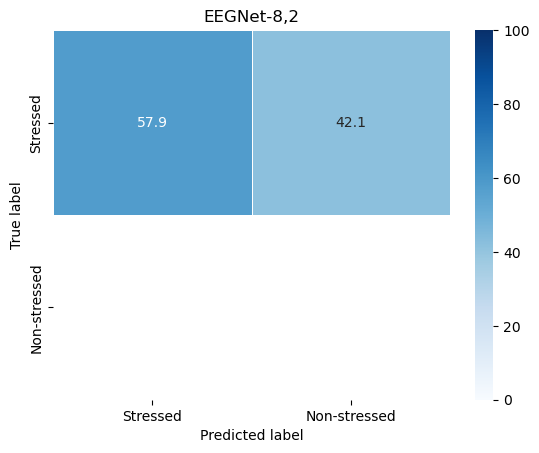

In [14]:
probs_TSGL = EEGNet_TSGL_classification('new_ica',train_data, test_data, val_data, train_labels, test_labels, val_labels)

In [15]:
print(probs_TSGL)
preds_TSGL = probs_TSGL.argmax(axis = -1)  
print(preds_TSGL)
print(test_labels[:,0].T)

performance_TSGL = compute_metrics(test_labels, preds_TSGL)
print(performance_TSGL)

[[0.54265636 0.45734364]
 [0.542629   0.45737097]
 [0.54260236 0.45739764]
 [0.54257625 0.45742375]
 [0.54198366 0.45801637]
 [0.5419707  0.4580293 ]
 [0.5423253  0.45767462]
 [0.54230547 0.45769456]
 [0.5422859  0.45771405]
 [0.54240954 0.45759046]
 [0.5423878  0.45761222]
 [0.5423665  0.4576335 ]
 [0.5423457  0.4576543 ]
 [0.5430049  0.45699513]
 [0.5429343  0.45706573]
 [0.54290026 0.4570997 ]
 [0.54283476 0.4571652 ]
 [0.5428032  0.45719677]
 [0.5427724  0.4572276 ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0]

 Confusion matrix:
[[11  0]
 [ 8  0]]
Null error in specificity
[57.89 57.89  0.  ]


Epoch 1/300

Epoch 1: val_loss improved from inf to 0.65343, saving model to /tmp\checkpoint.h5
2/2 - 11s - loss: 14.2775 - accuracy: 0.4318 - val_loss: 0.6534 - val_accuracy: 0.6875 - 11s/epoch - 5s/step
Epoch 2/300

Epoch 2: val_loss did not improve from 0.65343
2/2 - 11s - loss: 46.1517 - accuracy: 0.5682 - val_loss: 1.8009 - val_accuracy: 0.3125 - 11s/epoch - 5s/step
Epoch 3/300

Epoch 3: val_loss did not improve from 0.65343
2/2 - 10s - loss: 15.4540 - accuracy: 0.4318 - val_loss: 3.5466 - val_accuracy: 0.3125 - 10s/epoch - 5s/step
Epoch 4/300

Epoch 4: val_loss did not improve from 0.65343
2/2 - 11s - loss: 13.2943 - accuracy: 0.6136 - val_loss: 10.7280 - val_accuracy: 0.3125 - 11s/epoch - 6s/step
Epoch 5/300

Epoch 5: val_loss did not improve from 0.65343
2/2 - 9s - loss: 25.5426 - accuracy: 0.3864 - val_loss: 4.5104 - val_accuracy: 0.6875 - 9s/epoch - 4s/step
Epoch 6/300

Epoch 6: val_loss did not improve from 0.65343
2/2 - 8s - loss: 37.3861 - accuracy: 0.5682 - val_loss: 6.44

c:\Users\annej\anaconda3\envs\MNE\lib\site-packages\pyriemann\utils\viz.py:24: RuntimeWarning: invalid value encountered in true_divide
  cm = 100 * cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


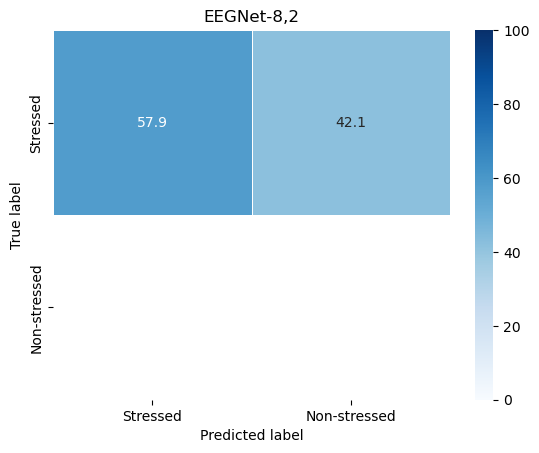

In [16]:
probs_Deep = EEGNet_DeepConvNet_classification('new_ica',train_data, test_data, val_data, train_labels, test_labels, val_labels)

In [17]:
print(probs_Deep)
preds_Deep = probs_Deep.argmax(axis = -1)  
print(preds_Deep)
print(test_labels.T)

performance_Deep = compute_metrics(test_labels, preds_Deep)
print(performance_Deep)

[[0.5360175  0.47232914]
 [0.5360175  0.47232914]
 [0.5360175  0.47232914]
 [0.5360175  0.47232914]
 [0.5360173  0.47232932]
 [0.5360173  0.4723293 ]
 [0.53601736 0.4723292 ]
 [0.53601736 0.4723292 ]
 [0.53601736 0.4723292 ]
 [0.5360174  0.47232917]
 [0.53601736 0.4723292 ]
 [0.53601736 0.4723292 ]
 [0.53601736 0.4723292 ]
 [0.5360176  0.472329  ]
 [0.53601754 0.47232905]
 [0.53601754 0.47232905]
 [0.53601754 0.47232908]
 [0.5360175  0.47232908]
 [0.5360175  0.47232908]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0]]

 Confusion matrix:
[[11  0]
 [ 8  0]]
Null error in specificity
[57.89 57.89  0.  ]


Epoch 1/300

Epoch 1: val_loss improved from inf to 833.00818, saving model to /tmp\checkpoint.h5
2/2 - 7s - loss: 172.6616 - accuracy: 0.5455 - val_loss: 833.0082 - val_accuracy: 0.3125 - 7s/epoch - 3s/step
Epoch 2/300

Epoch 2: val_loss improved from 833.00818 to 182.77060, saving model to /tmp\checkpoint.h5
2/2 - 5s - loss: 559.6158 - accuracy: 0.4318 - val_loss: 182.7706 - val_accuracy: 0.3125 - 5s/epoch - 3s/step
Epoch 3/300

Epoch 3: val_loss improved from 182.77060 to 164.71844, saving model to /tmp\checkpoint.h5
2/2 - 5s - loss: 144.0832 - accuracy: 0.5227 - val_loss: 164.7184 - val_accuracy: 0.6875 - 5s/epoch - 3s/step
Epoch 4/300

Epoch 4: val_loss improved from 164.71844 to 37.32534, saving model to /tmp\checkpoint.h5
2/2 - 5s - loss: 155.4380 - accuracy: 0.6136 - val_loss: 37.3253 - val_accuracy: 0.3125 - 5s/epoch - 3s/step
Epoch 5/300

Epoch 5: val_loss did not improve from 37.32534
2/2 - 5s - loss: 30.3556 - accuracy: 0.5909 - val_loss: 143.0764 - val_accuracy: 0.6875 - 5

c:\Users\annej\anaconda3\envs\MNE\lib\site-packages\pyriemann\utils\viz.py:24: RuntimeWarning: invalid value encountered in true_divide
  cm = 100 * cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


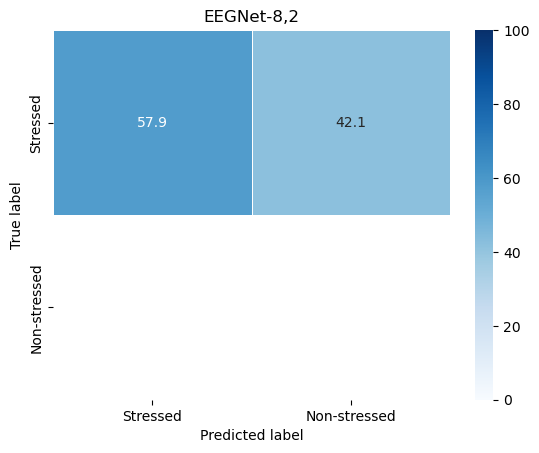

In [18]:
probs_Shallow = EEGNet_ShallowConvNet_classification('new_ica',train_data, test_data, val_data, train_labels, test_labels, val_labels)

In [19]:
print(probs_Shallow)
preds_Shallow = probs_Shallow.argmax(axis = -1)  
print(preds_Shallow)
print(test_labels.T)

performance_Shallow = compute_metrics(test_labels, preds_Shallow)
print(performance_Shallow)

[[0.57271165 0.42840087]
 [0.57271165 0.42840084]
 [0.5727115  0.42840093]
 [0.5727117  0.42840075]
 [0.572709   0.42840335]
 [0.5727086  0.42840353]
 [0.57271045 0.42840186]
 [0.5727103  0.42840186]
 [0.5727105  0.42840186]
 [0.5727108  0.42840147]
 [0.5727109  0.42840162]
 [0.57271045 0.42840177]
 [0.5727103  0.42840195]
 [0.5727126  0.42839977]
 [0.5727124  0.42840007]
 [0.57271224 0.42840007]
 [0.5727122  0.4284003 ]
 [0.57271194 0.42840013]
 [0.572712   0.42840016]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0]]

 Confusion matrix:
[[11  0]
 [ 8  0]]
Null error in specificity
[57.89 57.89  0.  ]


Epoch 1/300

Epoch 1: val_loss improved from inf to 0.77997, saving model to /tmp\checkpoint.h5
2/2 - 10s - loss: 0.7975 - accuracy: 0.5227 - val_loss: 0.7800 - val_accuracy: 0.3125 - 10s/epoch - 5s/step
Epoch 2/300

Epoch 2: val_loss improved from 0.77997 to 0.77827, saving model to /tmp\checkpoint.h5
2/2 - 7s - loss: 1.4099 - accuracy: 0.4318 - val_loss: 0.7783 - val_accuracy: 0.6875 - 7s/epoch - 4s/step
Epoch 3/300

Epoch 3: val_loss did not improve from 0.77827
2/2 - 8s - loss: 0.8408 - accuracy: 0.5227 - val_loss: 0.7785 - val_accuracy: 0.6875 - 8s/epoch - 4s/step
Epoch 4/300

Epoch 4: val_loss improved from 0.77827 to 0.77750, saving model to /tmp\checkpoint.h5
2/2 - 8s - loss: 0.8414 - accuracy: 0.3864 - val_loss: 0.7775 - val_accuracy: 0.6875 - 8s/epoch - 4s/step
Epoch 5/300

Epoch 5: val_loss improved from 0.77750 to 0.77736, saving model to /tmp\checkpoint.h5
2/2 - 8s - loss: 0.7919 - accuracy: 0.5455 - val_loss: 0.7774 - val_accuracy: 0.6875 - 8s/epoch - 4s/step
Epoch 6/300


1/1 [==============================] - 1s 598ms/step
Classification accuracy: 0.578947 


c:\Users\annej\anaconda3\envs\MNE\lib\site-packages\pyriemann\utils\viz.py:24: RuntimeWarning: invalid value encountered in true_divide
  cm = 100 * cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


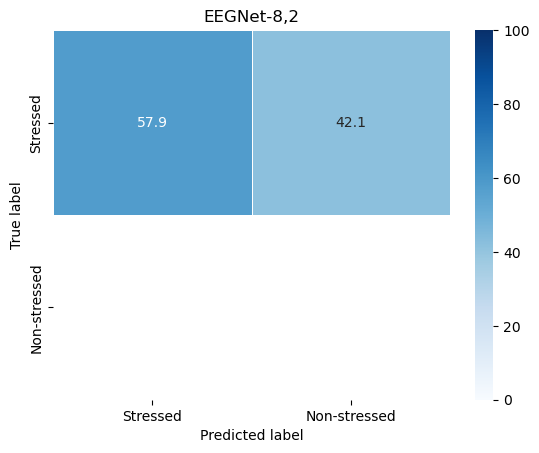

In [24]:
probs_TSGLEEGNet = EEGNet_TSGLEEGNet_classification('new_ica', train_data, test_data, val_data, train_labels, test_labels, val_labels)

In [25]:
print(probs_TSGLEEGNet)
preds_TSGLEEGNet = probs_Shallow.argmax(axis = -1)  
print(preds_TSGLEEGNet)
print(test_labels.T)

performance_TSGLEEGNet = compute_metrics(test_labels, preds_TSGLEEGNet)
print(performance_TSGLEEGNet)

[[0.57277614 0.4272239 ]
 [0.57273    0.42727003]
 [0.57268506 0.42731488]
 [0.57264143 0.42735854]
 [0.57171977 0.4282802 ]
 [0.5717015  0.42829838]
 [0.5722332  0.4277668 ]
 [0.5722018  0.4277982 ]
 [0.5721712  0.4278288 ]
 [0.57236767 0.42763233]
 [0.5723327  0.42766732]
 [0.5722986  0.42770135]
 [0.5722655  0.42773452]
 [0.5733805  0.42661947]
 [0.5732559  0.426744  ]
 [0.57319635 0.42680368]
 [0.57308215 0.42691785]
 [0.57302743 0.42697254]
 [0.5729743  0.4270257 ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0]]

 Confusion matrix:
[[11  0]
 [ 8  0]]
Null error in specificity
[57.89 57.89  0.  ]
